In [1]:
import pandas as pd

In [2]:
X_train = pd.read_csv("train_values.csv")  # Features for training
y_train = pd.read_csv("train_labels.csv")  # Labels for training
X_test = pd.read_csv("test_values.csv")    # Features for testing

In [3]:
X = X_train  # Features for training
y = y_train  # Labels for training
test_data = X_test  # Features for testing

In [4]:
X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
test_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#keeping only target variable in the y
y = y.drop(columns=["building_id"])

In [8]:
y.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [8]:
#checking null vlaues
print(X.isnull().sum())

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

#### encoding training data

In [10]:
# ENCODING
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')


In [11]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True).astype(int)

In [12]:
X

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,0,1,...,0,0,0,0,1,0,0,0,1,0
260597,669485,17,715,2060,2,0,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
260598,602512,17,51,8163,3,55,6,7,0,1,...,0,0,0,0,0,0,0,0,1,0
260599,151409,26,39,1851,2,10,14,6,0,0,...,0,0,0,0,0,0,0,0,1,0


#### encoding test_data

In [15]:
# ENCODING
categorical_cols_test_data= test_data.select_dtypes(include=['object']).columns
print(categorical_cols_test_data)

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')


In [16]:
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True).astype(int)

In [17]:
test_data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,300051,17,596,11307,3,20,7,6,0,1,...,0,0,0,0,0,0,0,0,1,0
1,99355,6,141,11987,2,25,13,5,0,1,...,0,0,0,0,0,0,0,0,1,0
2,890251,22,19,10044,2,5,4,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,745817,26,39,633,1,0,19,3,0,0,...,0,0,0,0,0,0,0,0,1,0
4,421793,17,289,7970,3,15,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,0,1,...,0,0,0,0,0,0,0,0,0,1
86864,663567,10,1407,11907,3,25,6,7,1,1,...,0,0,0,0,0,0,0,0,1,0
86865,1049160,22,1136,7712,1,50,3,3,0,1,...,0,0,0,0,0,0,0,0,1,0
86866,442785,6,1041,912,2,5,9,5,1,1,...,0,0,0,0,0,0,0,0,0,0


#### feature scaling / standardization training set

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
X_scaled

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0.910312,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,3.206391,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
1,-1.631438,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
2,-1.414337,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
3,0.214112,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
4,-1.063003,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,3.206391,-1.789003,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.535096,1.381653,1.536007,-1.271644,-1.552536,0.386932,-0.459460,-1.268946,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,6.692065,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
260597,0.472212,0.385835,0.033741,-1.151250,-0.178274,-0.360698,-0.459460,-0.226419,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
260598,0.252300,0.385835,-1.575137,0.522472,1.195989,0.386932,-0.459460,0.816109,-0.311877,0.558971,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878
260599,-1.228939,1.506130,-1.604213,-1.208568,-0.178274,-0.224765,1.361941,0.294845,-0.311877,-1.789003,...,-0.009188,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.075395,0.196223,-0.101878


#### feature scaling / standardization test_data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_data_scaled = pd.DataFrame(scaler.fit_transform(test_data), columns=test_data.columns)

In [24]:
test_data_scaled

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,-0.745856,0.387545,-0.261582,1.382754,1.190666,-0.089223,-0.231598,0.295710,-0.314394,0.558097,...,-0.007587,-0.014396,-0.013573,-0.020362,-0.151497,-0.034455,-0.121319,-0.077377,0.194741,-0.100113
1,-1.406516,-0.982399,-1.362313,1.569122,-0.182880,-0.021116,1.138930,-0.228690,-0.314394,0.558097,...,-0.007587,-0.014396,-0.013573,-0.020362,-0.151497,-0.034455,-0.121319,-0.077377,0.194741,-0.100113
2,1.196991,1.010246,-1.657455,1.036602,-0.182880,-0.293547,-0.916862,-0.228690,-0.314394,0.558097,...,-0.007587,-0.014396,-0.013573,-0.020362,-0.151497,-0.034455,-0.121319,-0.077377,0.194741,-0.100113
3,0.721536,1.508407,-1.609071,-1.542679,-1.556426,-0.361655,2.509459,-1.277491,-0.314394,-1.791803,...,-0.007587,-0.014396,-0.013573,-0.020362,-0.151497,-0.034455,-0.121319,-0.077377,0.194741,-0.100113
4,-0.345100,0.387545,-1.004273,0.468179,1.190666,-0.157331,-0.003176,0.820111,-0.314394,0.558097,...,-0.007587,-0.014396,-0.013573,-0.020362,-0.151497,-0.034455,-0.121319,-0.077377,0.194741,-0.100113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,-0.713013,-1.231479,-0.239810,-0.723207,1.190666,0.591854,2.737880,0.295710,-0.314394,0.558097,...,-0.007587,-0.014396,-0.013573,-0.020362,-0.151497,-0.034455,-0.121319,-0.077377,-5.135038,9.988741
86864,0.450782,-0.484237,1.700380,1.547196,1.190666,-0.021116,-0.460019,0.820111,3.180718,0.558097,...,-0.007587,-0.014396,-0.013573,-0.020362,-0.151497,-0.034455,-0.121319,-0.077377,0.194741,-0.100113
86865,1.720094,1.010246,1.044780,0.397469,-1.556426,0.319423,-1.145283,-1.277491,-0.314394,0.558097,...,-0.007587,-0.014396,-0.013573,-0.020362,-0.151497,-0.034455,-0.121319,-0.077377,0.194741,-0.100113
86866,-0.275998,-0.982399,0.814957,-1.466213,-0.182880,-0.293547,0.225245,-0.228690,3.180718,0.558097,...,-0.007587,-0.014396,-0.013573,-0.020362,-0.151497,-0.034455,-0.121319,-0.077377,-5.135038,-0.100113


#### training data correlation matrix

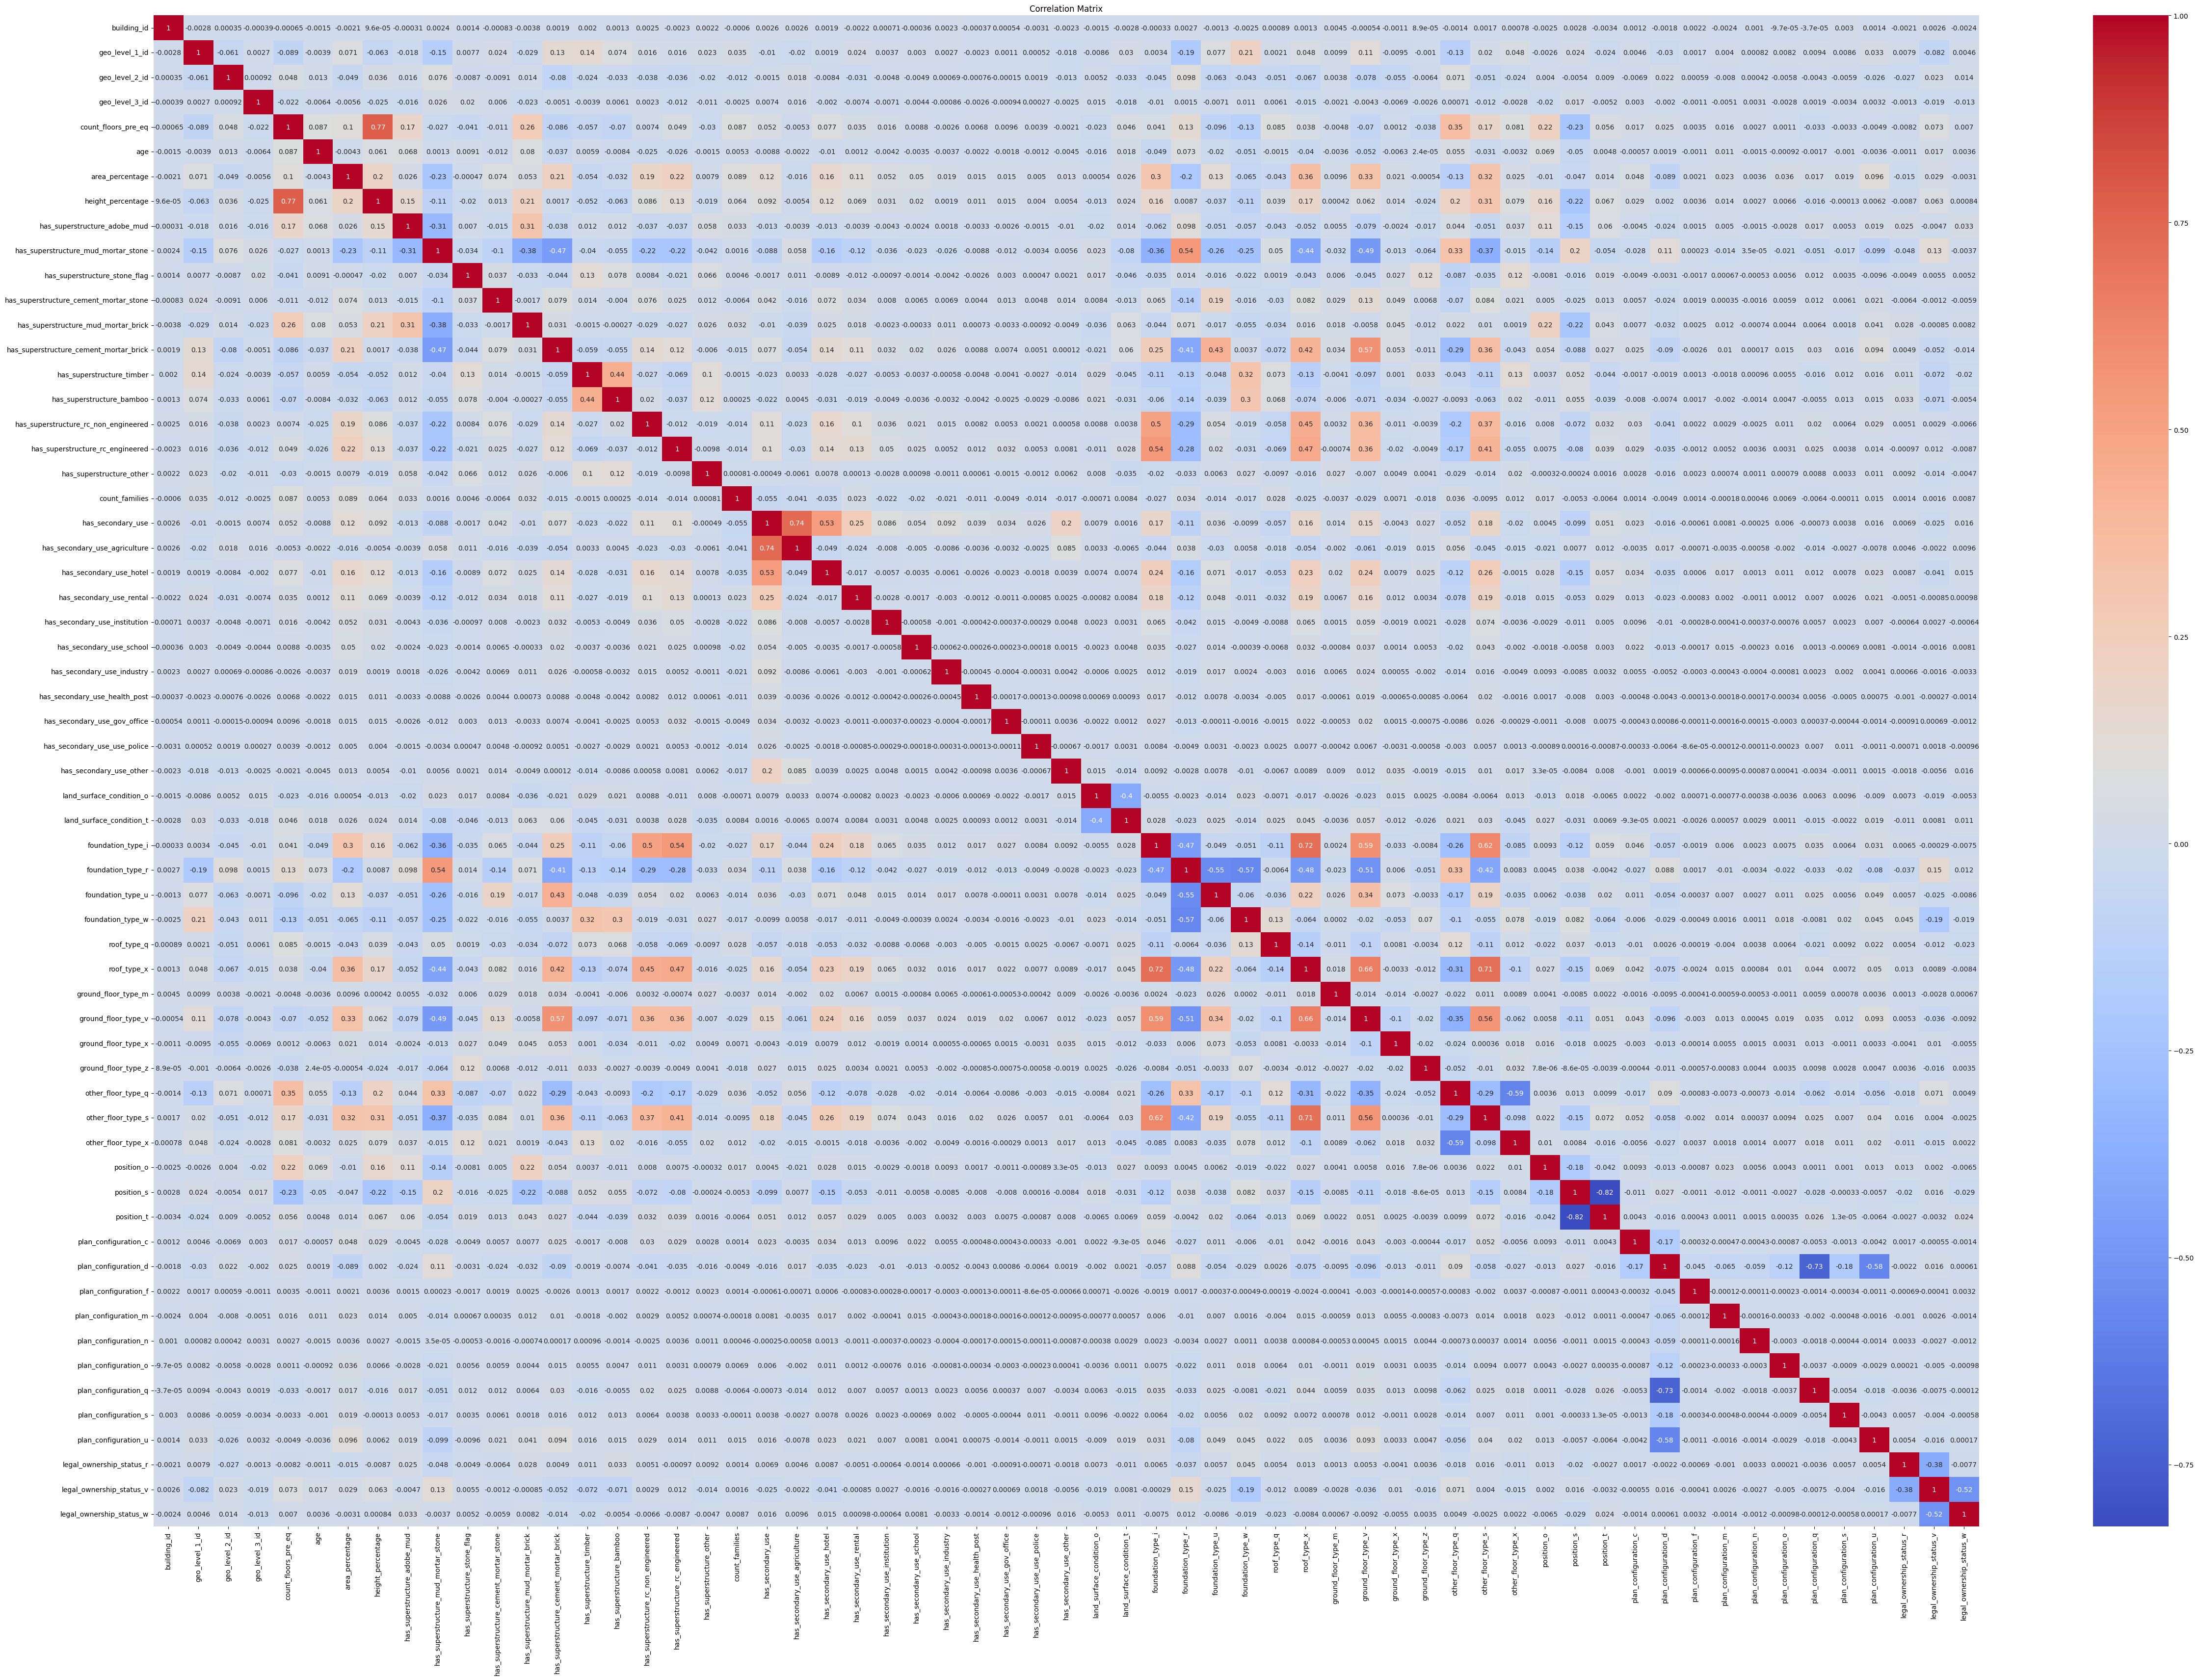

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 40))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## PLOTS

In [ ]:
# import matplotlib.pyplot as plt

# for column in X.columns:
#     plt.figure(figsize=(6, 4))  # Set individual figure size
#     X[column].hist(bins=30)
#     plt.title(column)
#     plt.xlabel("Value")
#     plt.ylabel("Frequency")
#     plt.show()


#### pca to reduce features for training data

In [26]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)



In [27]:
X_pca

array([[-0.89070353,  1.97690089,  0.77572877, ...,  2.05117694,
         0.692138  , -0.21120725],
       [-1.23088394,  0.41016141, -1.08582333, ..., -0.5258107 ,
         2.18142565,  0.51609512],
       [-0.3930419 ,  0.27994907,  0.5376331 , ..., -0.01799181,
         0.10657699,  0.45293065],
       ...,
       [-1.16766746,  0.8996767 , -0.31439348, ...,  0.00635605,
         0.00616619,  0.17196045],
       [ 5.88607536,  0.36004807, -0.65776194, ..., -0.73122787,
         0.69625119, -2.14475093],
       [-0.86154712,  1.37425469,  0.18485021, ...,  0.11363297,
        -1.69365546, -0.54291862]])

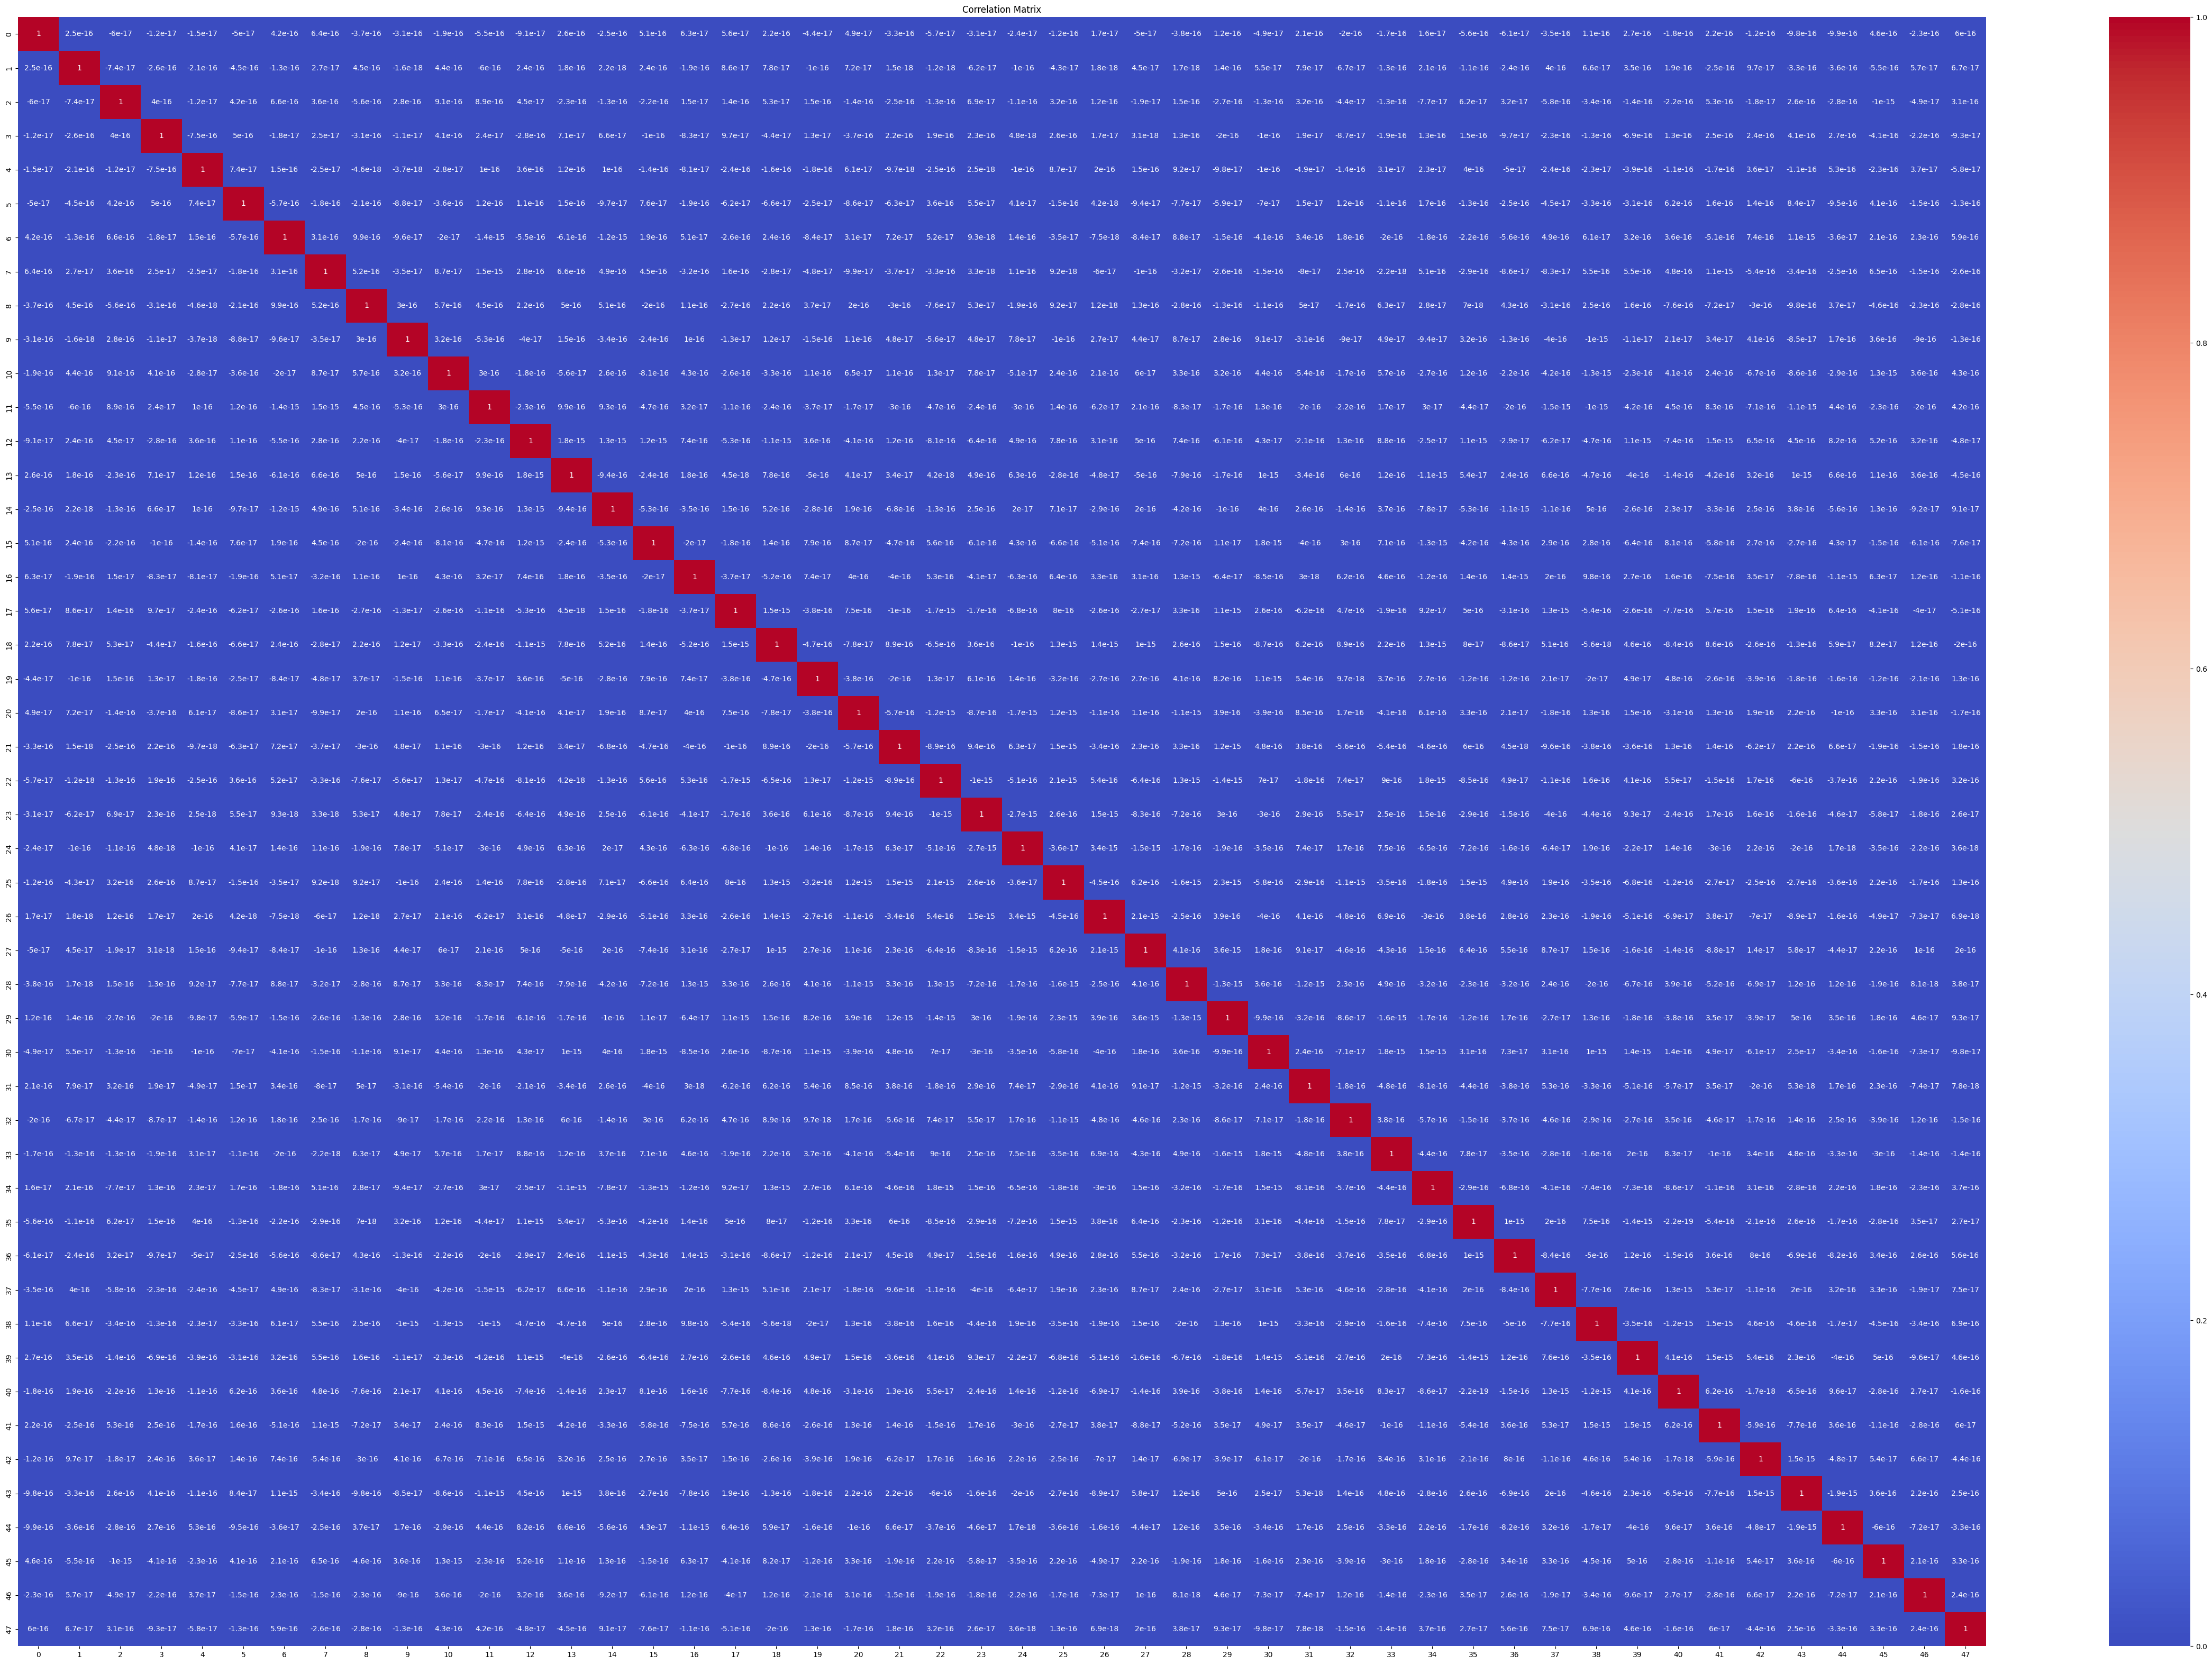

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 40))
sns.heatmap(pd.DataFrame(X_pca).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### PCA reducing featres for test_data

In [29]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=0.95)
test_data_pca = pca.fit_transform(test_data_scaled)

In [30]:
test_data_pca

array([[-1.07605546,  0.83478664, -0.74743378, ..., -0.18530102,
        -0.13020927, -0.14924438],
       [-0.60152433,  0.77603823, -1.75127269, ..., -0.36204082,
        -0.24068097,  0.25290117],
       [-1.17943686, -0.1955875 , -0.92359093, ..., -0.13383103,
         0.06329028, -0.34460264],
       ...,
       [-1.18589022, -1.93565558, -0.66886464, ...,  0.08609855,
        -0.09477659, -0.2248488 ],
       [-1.01271237,  0.28650444,  0.87827392, ...,  1.96436621,
        -0.93050302,  0.42528214],
       [ 1.77680134, -1.05119341, -0.25550655, ..., -0.57954499,
        -0.90644385,  2.16899736]])

#### plot: target variables

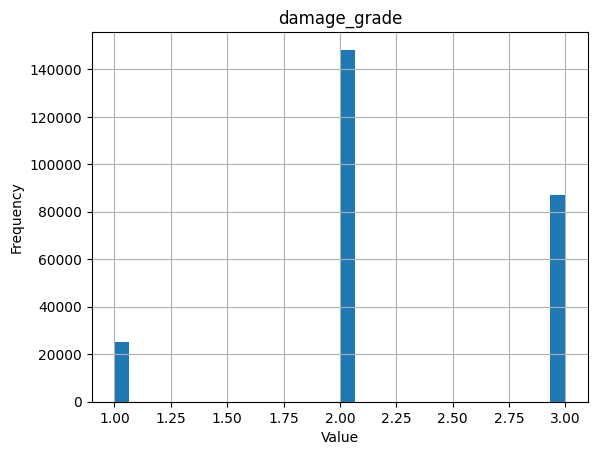

In [32]:

y["damage_grade"].hist(bins=30)
plt.title("damage_grade")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [33]:
import pandas as pd
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import f1_score

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

e:\chrome download\python\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [43]:
model = XGBClassifier()

In [44]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [75]:
y_pred = model.predict(X_test)

In [76]:
y_pred_original = le.inverse_transform(y_pred)

In [80]:
y_test_original = le.inverse_transform(y_test)

In [81]:
y_test_original

array([2, 2, 2, ..., 3, 3, 2], dtype=int64)

In [77]:
y_pred_original
# Create a DataFrame for the submission

array([3, 2, 2, ..., 2, 3, 2], dtype=int64)

In [85]:
f1 = f1_score(y_test_original, y_pred_original,average='micro')
print("Micro-averaged F1 score:", f1)


Micro-averaged F1 score: 0.723911667082366


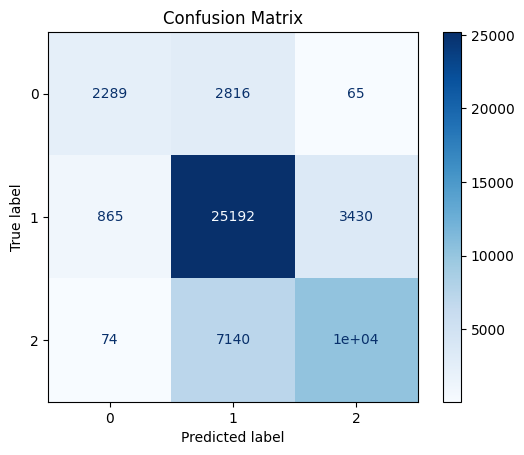

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_original, y_pred_original)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


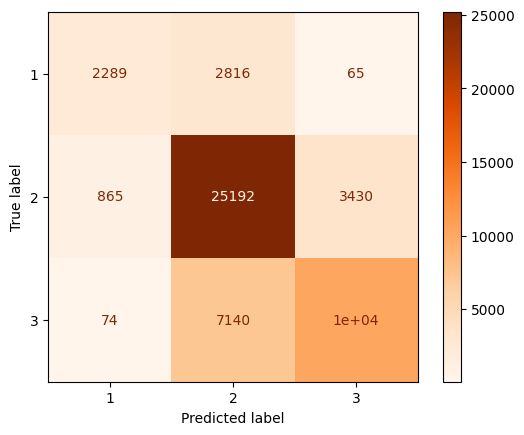

In [94]:
labels = le.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Oranges)
